In [222]:
# Setup notebook
from pathlib import Path
#from learntools.time_series.style import *  # plot style settings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [223]:
store_sales=pd.read_csv("train_small.csv")

In [224]:
store_sales.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [225]:
store_sales["date"]=pd.to_datetime(store_sales["date"])

In [226]:
store_sales = store_sales.set_index('date').to_period('D')

In [227]:
store_sales.head(3)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0


In [228]:
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)

In [229]:
store_sales.head(3)

id  sales  onpromotion
date       store_nbr family                            
2013-01-01 1         AUTOMOTIVE   0    0.0            0
                     BABY CARE    1    0.0            0
                     BEAUTY       2    0.0            0

In [230]:
average_sales = store_sales.groupby('date').mean()['sales']

In [231]:
store_sales.groupby('date').mean()

,id,sales,onpromotion
date,,,
2013-01-01,890.5,1.409438,0.000000
2013-01-02,2672.5,278.390807,0.000000
2013-01-03,4454.5,202.840197,0.000000
2013-01-04,6236.5,198.911154,0.000000
2013-01-05,8018.5,267.873244,0.000000
...,...,...,...
2017-08-11,2992868.5,463.733851,7.956790
2017-08-12,2994650.5,444.798280,4.664422
2017-08-13,2996432.5,485.768618,5.209315


In [232]:
average_sales.head(3)

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
Freq: D, Name: sales, dtype: float64

In [233]:
store_sales.head(40)

id  sales  onpromotion
date       store_nbr family                                            
2013-01-01 1         AUTOMOTIVE                   0    0.0            0
                     BABY CARE                    1    0.0            0
                     BEAUTY                       2    0.0            0
                     BEVERAGES                    3    0.0            0
                     BOOKS                        4    0.0            0
                     BREAD/BAKERY                 5    0.0            0
                     CELEBRATION                  6    0.0            0
                     CLEANING                     7    0.0            0
                     DAIRY                        8    0.0            0
                     DELI                         9    0.0            0
                     EGGS                        10    0.0            0
                     FROZEN FOODS                11    0.0            0
                     GROCERY I                   12    0.0            0
                     GROCERY II                  13    0.0            0
                     HARDWARE                    14    0.0            0
                     HOME AND KITCHEN I          15    0.0            0
                     HOME AND KITCHEN II         16    0.0            0
                     HOME APPLIANCES             17    0.0            0
                     HOME CARE                   18    0.0            0
                     LADIESWEAR                  19    0.0            0
                     LAWN AND GARDEN             20    0.0            0
                     LINGERIE                    21    0.0            0
                     LIQUOR,WINE,BEER            22    0.0            0
                     MAGAZINES                   23    0.0            0
                     MEATS                       24    0.0            0
                     PERSONAL CARE               25    0.0            0
                     PET SUPPLIES                26    0.0            0
                     PLAYERS AND ELECTRONICS     27    0.0            0
                     POULTRY                     28    0.0            0
                     PREPARED FOODS              29    0.0            0
                     PRODUCE                     30    0.0            0
                     SCHOOL AND OFFICE SUPPLIES  31    0.0            0
                     SEAFOOD                     32    0.0            0
           10        AUTOMOTIVE                  33    0.0            0
                     BABY CARE                   34    0.0            0
                     BEAUTY                      35    0.0            0
                     BEVERAGES                   36    0.0            0
                     BOOKS                       37    0.0            0
                     BREAD/BAKERY                38    0.0            0
                     CELEBRATION                 39    0.0            0

# Fitting a timestamp feature

In [234]:
average_sales.head(5)

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
Freq: D, Name: sales, dtype: float64

In [235]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()

time = np.arange(len(df.index))  # time dummy

df['time'] = time

In [236]:
df.head(3)

,sales,time
date,,
2013-01-01,1.409438,0
2013-01-02,278.390807,1
2013-01-03,202.840197,2


In [237]:
df.loc["2013-01-01",["time"]] # pandas

time    0.0
Name: 2013-01-01, dtype: float64

In [238]:
df.loc["2013-01-01","sales"] # numpy

1.409438271043771

In [239]:
X = df.loc[:, ['time']]  # features
y = df.loc[:, 'sales']  # target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [240]:
X.reset_index(inplace=True)

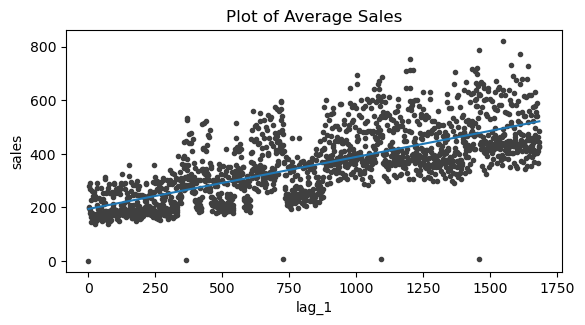

In [241]:
fig, ax = plt.subplots()
ax.plot(X["time"], y, '.', color='0.25')
ax.plot(X["time"], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Plot of Average Sales');

# Fitting a lag feature to store sales

In [242]:

df = average_sales.to_frame()

lag_1 = df['sales'].shift(1)

df['lag_1'] = lag_1

X = df.loc[:, ['lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

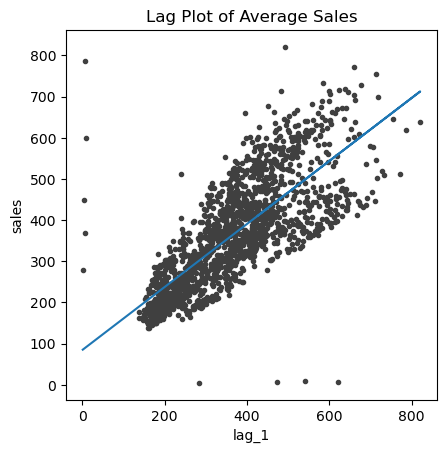

In [243]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');